In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
semi_balck = '#4F6272'
plt.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
num_layers = "4"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/xor_multi_arch/{res_folder}"
lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
n_features = 5

In [3]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results_with_preds"

In [8]:
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_path):
    if '._' in file_name:
        continue
    if 'all_exp_mape_prediction_results' not in file_name:
            continue
    if '2023-12-24' in file_name:
        feature_selection_res = pd.read_csv(f"{lgb_res_path}/{file_name}")
    if '2023-12-26' in file_name:
        feature_selection_res_new_ = pd.read_csv(f"{lgb_res_path}/{file_name}")
    else:
        feature_selection_res2 = pd.read_csv(f"{lgb_res_path}/{file_name}")
feature_selection_res = feature_selection_res.sort_values('num_features').reset_index()
feature_selection_res2 = feature_selection_res2.sort_values('num_features').reset_index()
feature_selection_res_new_ = feature_selection_res_new_.sort_values('num_features').reset_index()


,Unnamed: 0,num_features,train_r2,test_r2,train_mse,test_mse,train_mae,test_mae,train_mape,test_mape,model_name
0,1,1,0.907235,0.907190,1066.322542,1066.638308,22.742516,22.810821,0.035132,0.035292,2023-11-16-17-38-02_masked_data_1_features.pkl
1,2,2,0.949751,0.949889,600.064080,599.695417,16.772183,16.874387,0.026067,0.026259,2023-11-16-17-38-02_masked_data_2_features.pkl
2,3,3,0.965288,0.965084,419.963712,425.336307,13.474470,13.625720,0.021395,0.021643,2023-11-16-17-38-02_masked_data_3_features.pkl
3,4,4,0.967997,0.966679,387.601928,406.027342,13.054272,13.346468,0.020712,0.021190,2023-11-16-17-38-02_masked_data_4_features.pkl
4,5,5,0.975551,0.974572,298.381667,312.159852,11.449414,11.728584,0.018232,0.018701,2023-11-16-17-38-02_masked_data_5_features.pkl
5,6,6,0.974688,0.973567,308.650310,324.369404,11.687358,11.992402,0.018596,0.019097,2023-11-16-17-38-02_masked_data_6_features.pkl
6,7,7,0.976243,0.975245,290.244831,304.372207,11.345909,11.668604,0.018063,0.018596,2023-11-16-17-38-02_masked_data_7_features.pkl
7,8,8,0.977783,0.976879,271.848538,284.876720,11.003597,11.306544,0.017531,0.018023,2023-11-16-17-38-02_masked_data_8_features.pkl
8,9,9,0.979171,0.978176,255.390744,269.082629,10.696261,11.030843,0.017047,0.017608,2023-11-16-17-38-02_masked_data_9_features.pkl
9,10,10,0.980927,0.979874,234.327589,248.702366,10.267086,10.627840,0.016353,0.016945,2023-11-16-17-38-02_masked_data_10_features.pkl


In [6]:
feature_selection_res2

['teach_archs_regression_feature_selection_results_with_preds_12kep_old',
 'teach_archs_regression_feature_selection_results_with_preds_12kep',
 '2023-11-16-17-38-02_1_90_feature_selection.csv',
 '._2023-11-16-17-38-02_1_90_feature_selection.csv',
 '2023-12-24-17-16-10_all_exp_mape_prediction_results.csv',
 '90_prediction_results.csv',
 '2023-12-18-16-00-07_all_exp_mape_prediction_results.csv',
 '40_prediction_results.csv',
 '5_feature_values.csv',
 '._teach_archs_regression_feature_selection_results',
 '2023-11-16-17-38-02_1_90_used_features.csv',
 '._masked_data_models',
 '2023-12-26-12-54-37_all_exp_mape_prediction_results.csv',
 '5_prediction_results.csv',
 'teach_archs_regression_feature_selection_results',
 'teach_archs_regression_feature_selection_results_with_preds',
 'masked_data_models',
 'teach_archs_regression_feature_selection_results_with_preds_by_mae',
 '96_prediction_results.csv',
 '2023-12-21-22-08-39_num_features_uniq_decay.csv',
 'teach_archs_regression_feature_selec

In [6]:
feature_selection_ind_res = pd.DataFrame()
all_preds = {}
for file_name in os.listdir(lgb_res_nn_path):
    if '._' in file_name:
        continue
    if 'prediction_results.csv' not in file_name:
        continue
    model = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    num_features = int(file_name.split('only_')[1].split('_features')[0])
    all_preds[num_features] = model

In [7]:
feature_selection_res = feature_selection_res[feature_selection_res['num_features']!=40][feature_selection_res['num_features']!=96]

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_46628/1375337670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature_selection_res = feature_selection_res[feature_selection_res['num_features']!=40][feature_selection_res['num_features']!=96]


In [8]:
feature_selection_res_new = feature_selection_res_new_
#[feature_selection_res_new_['num_features']!=40][feature_selection_res_new_['num_features']!=96][feature_selection_res_new_['num_features']!=90]


In [9]:
feature_selection_res['mape_reletive_cahnge'] = (feature_selection_res[
                                                     'test_mape'] - feature_selection_res['test_mape'].min()) / \
                                                feature_selection_res['test_mape'].min()
feature_selection_res['best r2 test'] =feature_selection_res2['best r2 test']
feature_selection_res['best r2 train'] =feature_selection_res2['best r2 train']
feature_selection_res['r2_reletive_cahnge'] = (feature_selection_res2['best r2 test'].max() - feature_selection_res2[
    'best r2 test']) / feature_selection_res2['best r2 test'].max()

In [10]:
feature_selection_res_new['mape_reletive_cahnge'] = (feature_selection_res_new[
                                                     'test_mape'] - feature_selection_res_new['test_mape'].min()) / \
                                                feature_selection_res_new['test_mape'].min()
feature_selection_res_new['best r2 test'] =feature_selection_res2['best r2 test']
feature_selection_res_new['best r2 train'] =feature_selection_res2['best r2 train']
feature_selection_res_new['r2_reletive_cahnge'] = (feature_selection_res2['best r2 test'].max() - feature_selection_res2[
    'best r2 test']) / feature_selection_res2['best r2 test'].max()

In [11]:
feature_selection_res

,index,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,mape_reletive_cahnge,best r2 test,best r2 train,r2_reletive_cahnge
0,13,13,2023-11-16-17-38-02_masked_data_1_features,1,0.036745,0.001262,0.036941,0.001265,2.241056,0.915278,0.910586,0.077861
1,8,8,2023-11-16-17-38-02_masked_data_2_features,2,0.029669,0.000836,0.029649,0.000828,1.601312,0.945893,0.943081,0.047016
2,17,17,2023-11-16-17-38-02_masked_data_3_features,3,0.027079,0.000762,0.027159,0.000758,1.382872,0.955011,0.953344,0.037830
3,16,16,2023-11-16-17-38-02_masked_data_4_features,4,0.023022,0.000679,0.023279,0.000695,1.042454,0.961227,0.959941,0.031568
4,2,2,2023-11-16-17-38-02_masked_data_5_features,5,0.021381,0.000447,0.021869,0.000468,0.918701,0.975073,0.973835,0.017618
5,15,15,2023-11-16-17-38-02_masked_data_6_features,6,0.021702,0.000412,0.022149,0.000442,0.943297,0.974991,0.975427,0.017700
6,5,5,2023-11-16-17-38-02_masked_data_7_features,7,0.020691,0.000383,0.021177,0.000410,0.857951,0.976599,0.976189,0.016080
7,14,14,2023-11-16-17-38-02_masked_data_8_features,8,0.017760,0.000356,0.018531,0.000380,0.625872,0.978070,0.977488,0.014599
8,0,0,2023-11-16-17-38-02_masked_data_9_features,9,0.018270,0.000334,0.019113,0.000370,0.676874,0.978973,0.978004,0.013689
9,1,1,2023-11-16-17-38-02_masked_data_10_features,10,0.016794,0.000307,0.017684,0.000337,0.551524,0.980645,0.981081,0.012004


In [12]:
feature_selection_res_new

,index,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,mape_reletive_cahnge,best r2 test,best r2 train,r2_reletive_cahnge
0,13,13,2023-11-16-17-38-02_masked_data_1_features,1,0.036350,0.001309,0.036302,0.001307,2.241491,0.915278,0.910586,0.077861
1,8,8,2023-11-16-17-38-02_masked_data_2_features,2,0.032221,0.000770,0.032184,0.000768,1.873774,0.945893,0.943081,0.047016
2,17,17,2023-11-16-17-38-02_masked_data_3_features,3,0.027799,0.000801,0.027807,0.000792,1.482927,0.955011,0.953344,0.037830
3,16,16,2023-11-16-17-38-02_masked_data_4_features,4,0.023526,0.000693,0.023742,0.000719,1.119958,0.961227,0.959941,0.031568
4,2,2,2023-11-16-17-38-02_masked_data_5_features,5,0.018446,0.000417,0.019161,0.000449,0.710942,0.975073,0.973835,0.017618
5,15,15,2023-11-16-17-38-02_masked_data_6_features,6,0.020879,0.000473,0.021461,0.000500,0.916277,0.974991,0.975427,0.017700
6,5,5,2023-11-16-17-38-02_masked_data_7_features,7,0.021650,0.000453,0.022343,0.000474,0.994992,0.976599,0.976189,0.016080
7,14,14,2023-11-16-17-38-02_masked_data_8_features,8,0.016936,0.000358,0.017819,0.000390,0.591109,0.978070,0.977488,0.014599
8,0,0,2023-11-16-17-38-02_masked_data_9_features,9,0.029886,0.000461,0.030301,0.000481,1.705574,0.978973,0.978004,0.013689
9,1,1,2023-11-16-17-38-02_masked_data_10_features,10,0.018713,0.000305,0.019499,0.000347,0.741128,0.980645,0.981081,0.012004


In [13]:
feature_selection_res_new[feature_selection_res_new['num_features'].isin((80, 30, 5))][[
    'train_mape',
    'test_mape',
    'mape_reletive_cahnge',
    'best r2 train',
    'best r2 test',
    'r2_reletive_cahnge',
    'num_features',
]].round(4)

,train_mape,test_mape,mape_reletive_cahnge,best r2 train,best r2 test,r2_reletive_cahnge,num_features
4,0.0184,0.0192,0.7109,0.9738,0.9751,0.0176,5
11,0.0097,0.0127,0.1381,0.9920,0.9910,0.0016,30
16,0.0082,0.0112,0.0000,0.9941,0.9921,0.0005,80


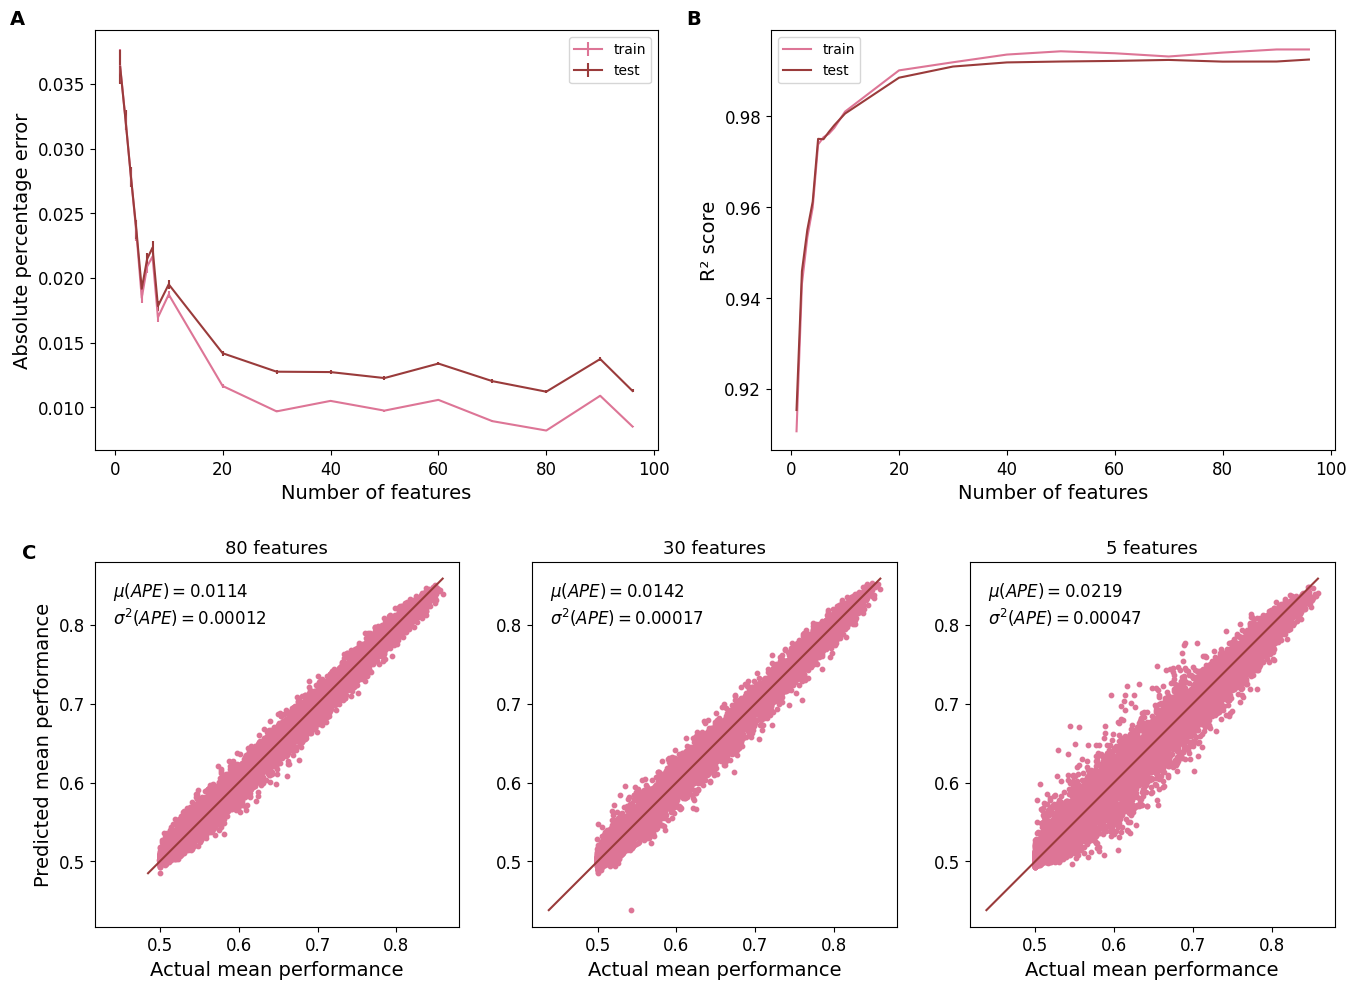

In [14]:

fetureas =[80, 30, 5]
start = 100
stop = 0
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)

ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

for ax, num_fet in zip((ax1, ax2, ax3), fetureas):
    model = all_preds[num_fet]
    start_ = min(model['test_label'].min(), model['test_pred'].min())
    if start_ < start:
        start = start_
    stop_ = max(model['test_label'].max(), model['test_pred'].max())
    if stop_ > stop:
        stop = stop_
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=rads[2])
    res = feature_selection_res[feature_selection_res['num_features'] == num_fet]
    textstr = '\n'.join((
        r'$\mu(APE)=%.4f $' % (res['test_mape']),
        r'$\sigma^2(APE) =%.5f $' % (res['test_mape_var']),))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=rads[3])
    ax.set_title(
        f"{num_fet} features",
        wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=14)
    ax.tick_params(axis='both',  labelsize=12)
ax1.set_ylabel('Predicted mean performance', fontsize=14)


#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)
feature_selection_res = feature_selection_res_new[feature_selection_res_new['num_features'] !=9]
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['train_mape'], yerr= feature_selection_res['train_mape_var'],
             label='train', c=rads[2])
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['test_mape'], yerr= feature_selection_res['test_mape_var'],
             label='test', c=rads[3])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=rads[2])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=rads[3])
ax0.set_xlabel('Number of features', fontsize=14)
ax0.set_ylabel(f'Absolute percentage error', fontsize=14)
ax01.set_xlabel('Number of features', fontsize=14)
ax01.set_ylabel(f'R\N{SUPERSCRIPT TWO} score', fontsize=14)
ax0.legend()
ax01.legend()
#plt.suptitle(
 #   f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
  #  wrap=True, fontsize=16 , y=0.91)
ax0.tick_params(axis='both',  labelsize=12)
ax01.tick_params(axis='both',  labelsize=12)
for l, ax_ in zip(['A', 'B'], [ax0, ax01, ]):
    ax_.text(-0.15, 1.05, l, transform=ax_.transAxes, fontsize=14, verticalalignment='top', weight="bold")
ax1.text(-0.2, 1.05, 'C', transform=ax1.transAxes, fontsize=14, verticalalignment='top', weight="bold")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png", bbox_inches='tight')
plt.show()

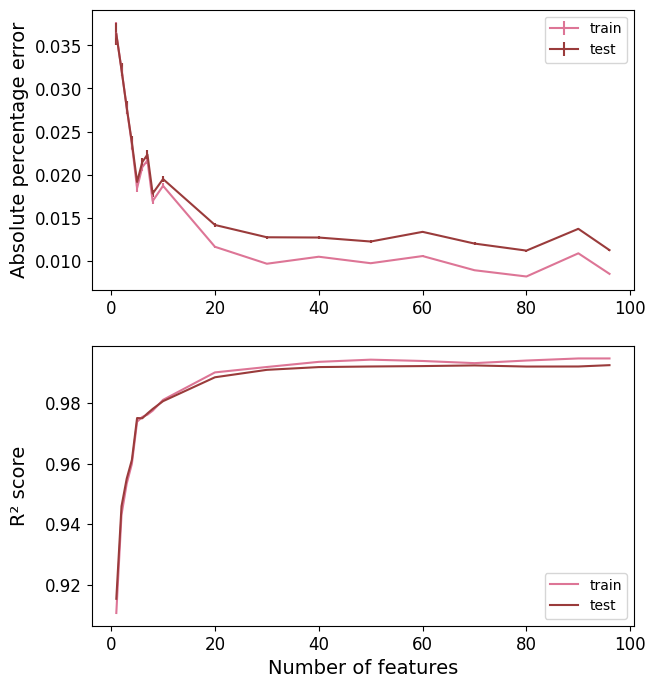

In [16]:

fetureas = [50, 20, 3]
start = 100
stop = 0
fig, (ax0, ax01) = plt.subplots(2,1, figsize=(7, 8))


feature_selection_res = feature_selection_res_new[feature_selection_res_new['num_features'] !=9]
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['train_mape'], yerr= feature_selection_res['train_mape_var'],
             label='train', c=rads[2])
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['test_mape'], yerr= feature_selection_res['test_mape_var'],
             label='test', c=rads[3])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=rads[2])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=rads[3])
#ax0.set_xlabel('Number of features', fontsize=14)
ax0.set_ylabel(f'Absolute percentage error', fontsize=14)
ax01.set_xlabel('Number of features', fontsize=14)
ax01.set_ylabel(f'R\N{SUPERSCRIPT TWO} score', fontsize=14)
ax0.legend()
ax01.legend()
fig.align_ylabels([ax0, ax01])

#plt.suptitle(
 #   f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
  #  wrap=True, fontsize=16 , y=0.91)
ax0.tick_params(axis='both',  labelsize=12)
ax01.tick_params(axis='both',  labelsize=12)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_pres.png", bbox_inches='tight')
plt.show()

In [55]:
feature_selection_res

,index,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,mape_reletive_cahnge,best r2 test,best r2 train,r2_reletive_cahnge
0,13,13,2023-11-16-17-38-02_masked_data_1_features,1,0.036350,0.001309,0.036302,0.001307,2.241491,0.915278,0.910586,0.077861
1,8,8,2023-11-16-17-38-02_masked_data_2_features,2,0.032221,0.000770,0.032184,0.000768,1.873774,0.945893,0.943081,0.047016
2,17,17,2023-11-16-17-38-02_masked_data_3_features,3,0.027799,0.000801,0.027807,0.000792,1.482927,0.955011,0.953344,0.037830
3,16,16,2023-11-16-17-38-02_masked_data_4_features,4,0.023526,0.000693,0.023742,0.000719,1.119958,0.961227,0.959941,0.031568
4,2,2,2023-11-16-17-38-02_masked_data_5_features,5,0.018446,0.000417,0.019161,0.000449,0.710942,0.975073,0.973835,0.017618
5,15,15,2023-11-16-17-38-02_masked_data_6_features,6,0.020879,0.000473,0.021461,0.000500,0.916277,0.974991,0.975427,0.017700
6,5,5,2023-11-16-17-38-02_masked_data_7_features,7,0.021650,0.000453,0.022343,0.000474,0.994992,0.976599,0.976189,0.016080
7,14,14,2023-11-16-17-38-02_masked_data_8_features,8,0.016936,0.000358,0.017819,0.000390,0.591109,0.978070,0.977488,0.014599
9,1,1,2023-11-16-17-38-02_masked_data_10_features,10,0.018713,0.000305,0.019499,0.000347,0.741128,0.980645,0.981081,0.012004
10,6,6,2023-11-16-17-38-02_masked_data_20_features,20,0.011641,0.000123,0.014173,0.000205,0.265511,0.988554,0.990168,0.004036


In [13]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0", axis=1)

In [14]:
selected_feature_names = list(selected_features_res.columns)[:-1]

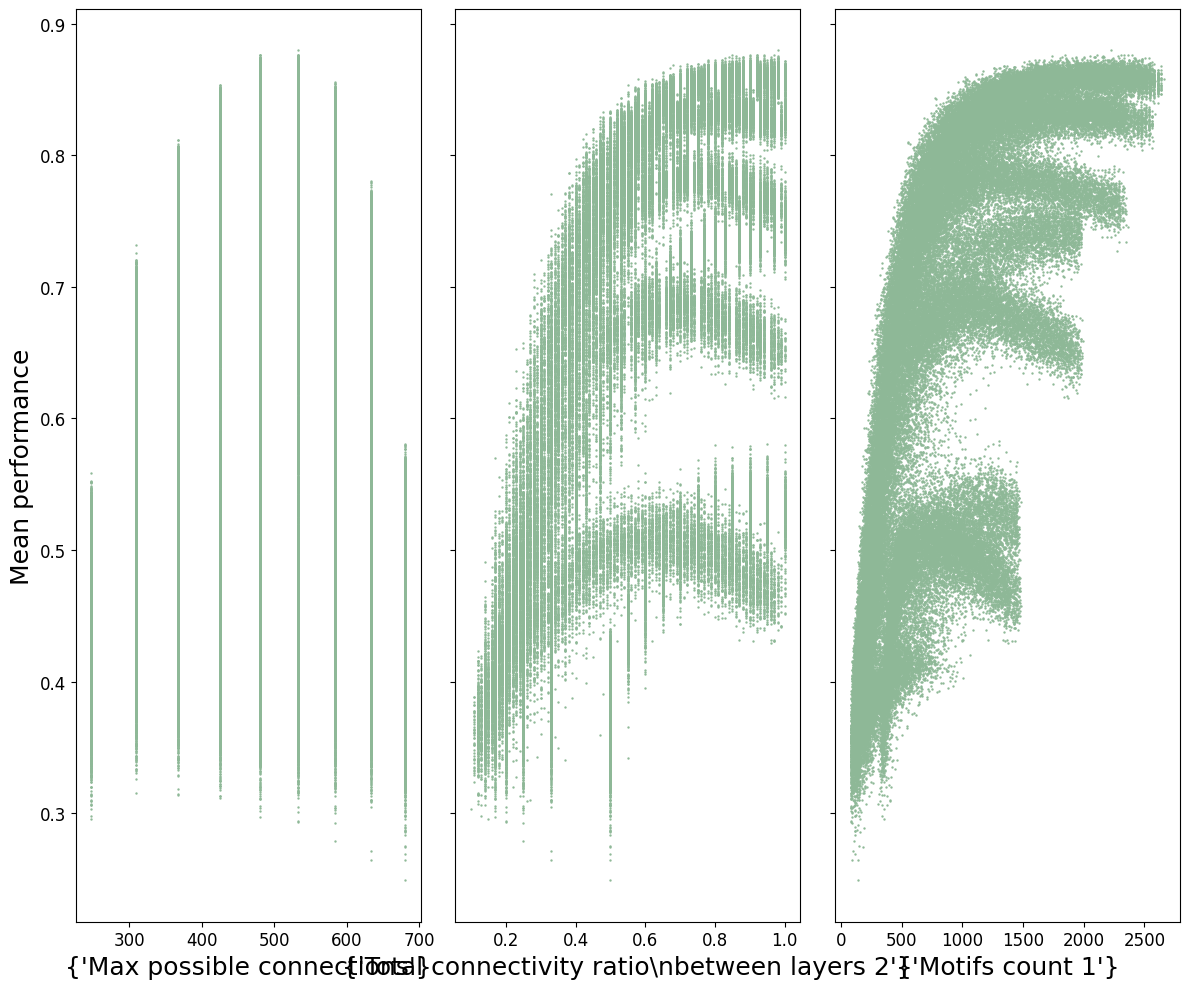

In [45]:
num_columns = int(np.ceil(len(selected_feature_names) // 3))
num_rows = int(np.ceil(len(selected_feature_names) // num_columns))
fig, axs = plt.subplots(num_columns, num_rows, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
if num_columns > 1 and num_rows > 1:
    r, c, = axs.shape
    for i in range(r):
        for j in range(c):
            idxs.append((i, j))
else:
    for j in range(axs.shape[0]):
        idxs.append(j)
for k, (f_name, loc_) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[loc_].scatter(x_data, selected_features_res['label'], c=COLORS[3], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[loc_].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[loc_].tick_params(axis='x', labelsize=12)
    axs[loc_].tick_params(axis='y', labelsize=12)
#axs[1].set_ylabel(f"Mean performance", fontsize=18)
axs[0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_fetaures_dist.png")
